<center>
<img src='project4-logo.png' style="border-radius: 50%; width: 200px; height: 200px; object-fit: cover;">
</center>
<center><h1>Employee Attrition Risk Analysis</h1></center>
<center><p>HR Analytics Dashboard Dataset for Employee Attrition Analysis</p></center>
<h2>About Dataset</h2>
<p>This dataset is designed for analyzing employee attrition patterns and HR analytics using Power BI and other business intelligence tools. It includes 1,470 employee records with fields related to demographics, job satisfaction, compensation, and career progression.</p>
<h2>Source</h2>
<b>Kaggle: <a href="https://www.kaggle.com/datasets/anubhav761/hr-analytics-dashboard-employee-attrition/data">Attrition</a></b>

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('datasets/Cleaned_Employee_Data.xlsx')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

# 1. Preprocessing Data

## 1. Missing Data

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.isnull().sum().sum()

np.int64(0)

## 2. Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

## 3. Reduce Features

<strong>Removed features that were less informative for the EDA process</strong>

In [10]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
df.shape

(1470, 31)

In [12]:
# Save the DataFrame resulting from data cleaning to a file using pickle, so you don't have to do the same steps if you want to do analysis
with open('./datasets/data_cleaned.pkl', 'wb') as file:
    pickle.dump(df, file)

# 2. Exploratory Data Analysis (EDA)

In [2]:
# Loading DataFrame from pickle file
with open('./datasets/data_cleaned.pkl', 'rb') as file:
    df = pickle.load(file)

## 1. Demographic & Personal Information

<p>In this pahse we will use the features:</p>
<ul>
<li>Age</li>
<li>Gender</li>
<li>Marital Status</li>
<li>Education</li>
<li>Education Field</li>
</ul>

In [3]:
df[['Attrition','Age','Gender','MaritalStatus','Education','EducationField']].dtypes

Attrition         object
Age                int64
Gender            object
MaritalStatus     object
Education          int64
EducationField    object
dtype: object

In [4]:
df[['Attrition', 'Age','Gender','MaritalStatus','Education','EducationField']].head()

,Attrition,Age,Gender,MaritalStatus,Education,EducationField
0,Yes,41,Female,Single,2,Life Sciences
1,No,49,Male,Married,1,Life Sciences
2,Yes,37,Male,Single,2,Other
3,No,33,Female,Married,4,Life Sciences
4,No,27,Male,Married,1,Medical


In [5]:
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

In [6]:
df['EducationLevel'] = df['Education'].map(education_map)
df[['Attrition','Gender','MaritalStatus','Education','EducationLevel','EducationField']].head()

,Attrition,Gender,MaritalStatus,Education,EducationLevel,EducationField
0,Yes,Female,Single,2,College,Life Sciences
1,No,Male,Married,1,Below College,Life Sciences
2,Yes,Male,Single,2,College,Other
3,No,Female,Married,4,Master,Life Sciences
4,No,Male,Married,1,Below College,Medical


In [9]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

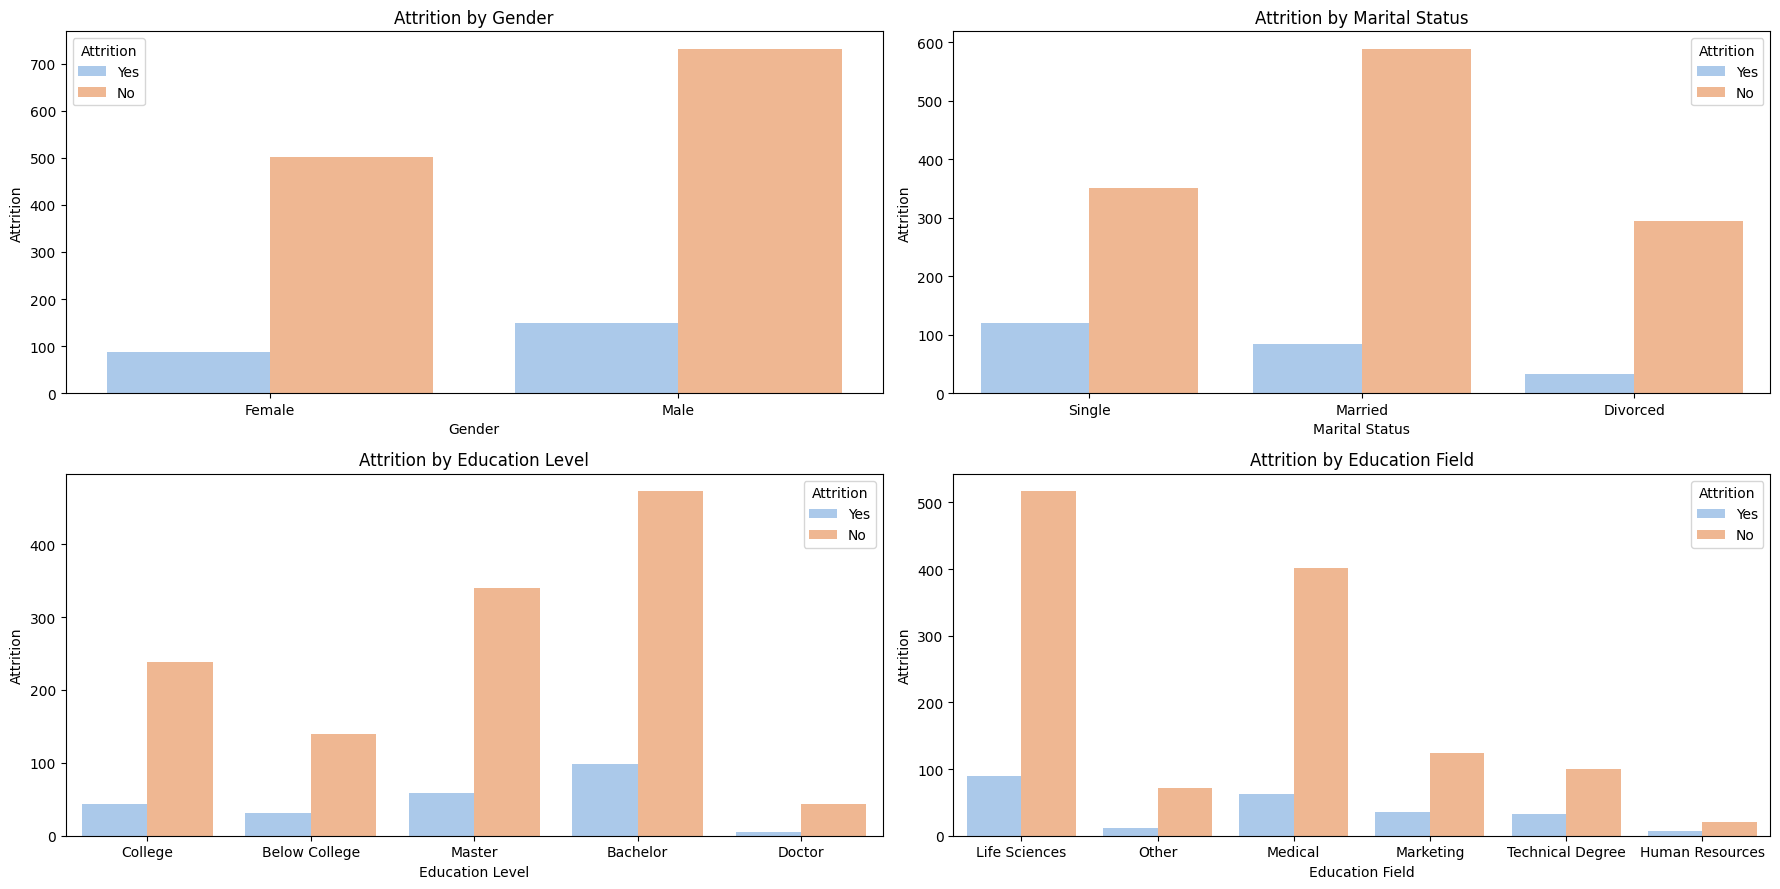

In [ ]:
# Figure with several sub plots
fig, axs = plt.subplots(2, 2, figsize=(18,9))
# Plot 1
sns.countplot(data=df, x='Gender', hue='Attrition', palette='pastel', ax=axs[0,0])
axs[0, 0].set_title('Attrition by Gender')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Attrition')
axs[0, 0].legend(title='Attrition')

# Plot 2
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='pastel', ax=axs[0,1])
axs[0, 1].set_title('Attrition by Marital Status')
axs[0, 1].set_xlabel('Marital Status')
axs[0, 1].set_ylabel('Attrition')
axs[0, 1].legend(title='Attrition')

# Plot 3
sns.countplot(data=df, x='EducationLevel', hue='Attrition', palette='pastel', ax=axs[1,0])
axs[1, 0].set_title('Attrition by Education Level')
axs[1, 0].set_xlabel('Education Level')
axs[1, 0].set_ylabel('Attrition')
axs[1, 0].legend(title='Attrition')

# Plot 4
sns.countplot(data=df, x='EducationField', hue='Attrition', palette='pastel', ax=axs[1,1])
axs[1, 1].set_title('Attrition by Education Field')
axs[1, 1].set_xlabel('Education Field')
axs[1, 1].set_ylabel('Attrition')
axs[1, 1].legend(title='Attrition')

# Show Plot
plt.tight_layout()
plt.show()

<strong>Normalizing "relative proportions" to eliminate bias effects due to differences in the number of observations between categories</strong>

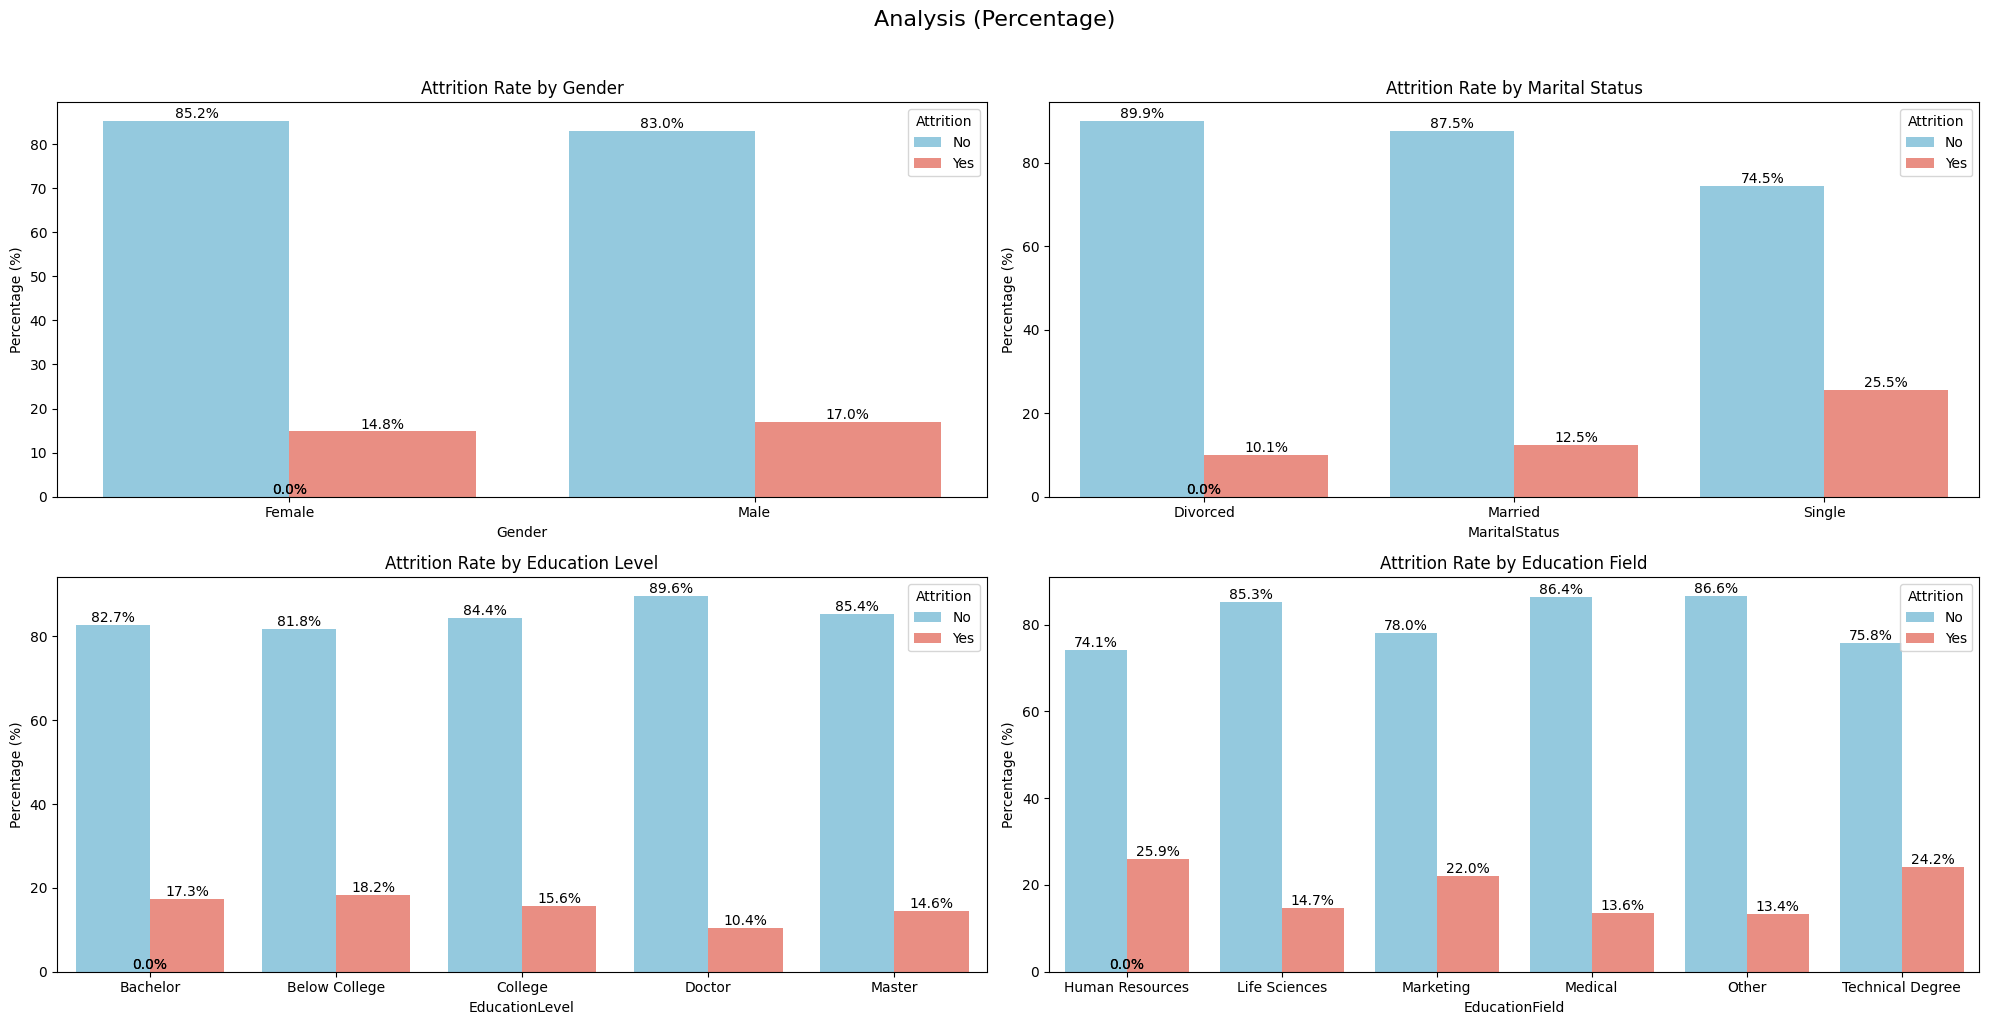

In [7]:
# Figure with several sub plots
fig, axs = plt.subplots(2, 2,figsize=(20,10))
plt.suptitle('Analysis (Percentage)', fontsize=16, y=1.02)

# Function to plot Attrition percentage
def plot_percentage(data, x_var, ax, title):
    # Calculate Attrition percentage per category
    cross_tab = pd.crosstab(data[x_var], data['Attrition'], normalize='index') * 100
    cross_tab = cross_tab.reset_index().melt(id_vars=x_var, var_name='Attrition', value_name='Percentage')
    # Plot
    sns.barplot(data=cross_tab, x=x_var, y='Percentage', hue='Attrition', palette=['skyblue', 'salmon'], ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_var)
    ax.set_ylabel('Percentage (%)')
    ax.legend(title='Attrition')
    # Adds a percentage value above the bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
# Plot 1
plot_percentage(df, 'Gender', axs[0, 0], 'Attrition Rate by Gender')
# Plot 2
plot_percentage(df, 'MaritalStatus', axs[0, 1], 'Attrition Rate by Marital Status')
# Plot 3
plot_percentage(df, 'EducationLevel', axs[1, 0], 'Attrition Rate by Education Level')
# Plot 4
plot_percentage(df, 'EducationField', axs[1, 1], 'Attrition Rate by Education Field')

# Adjust Layout
plt.tight_layout()
plt.savefig('results/demographic_and_personal_information_analysis.png')
plt.show()

In [7]:
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [8]:
print("Min Age: ", df['Age'].min())
print("Max Age: ", df['Age'].max())

Min Age:  18
Max Age:  60


<strong>We Will make Category for Age to clear insight</strong>

In [9]:
# Binning for Age Category
bins = [18, 24, 34, 44, 54, 60]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged', 'Older Worker']
# Make new feature
df['AgeCategory'] = pd.cut(
    df['Age'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

df[['Attrition','Age','AgeCategory']].head()

,Attrition,Age,AgeCategory
0,Yes,41,Adult
1,No,49,Middle Aged
2,Yes,37,Adult
3,No,33,Young Adult
4,No,27,Young Adult


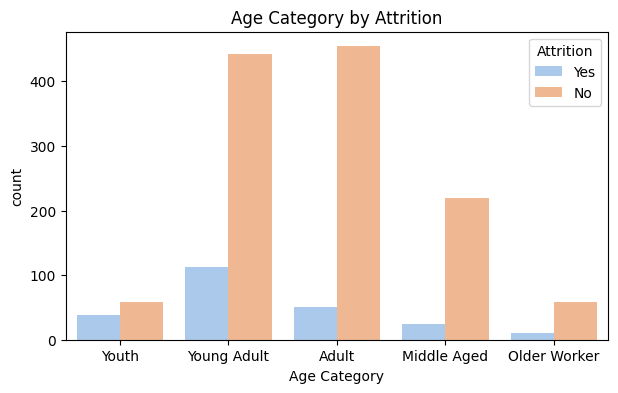

In [11]:
# Visualization for Age Category
plt.figure(figsize=(7,4))

sns.countplot(data=df, x='AgeCategory', hue='Attrition', palette='pastel')
plt.title('Age Category by Attrition')
plt.xlabel('Age Category')
plt.legend(title='Attrition')
plt.show()

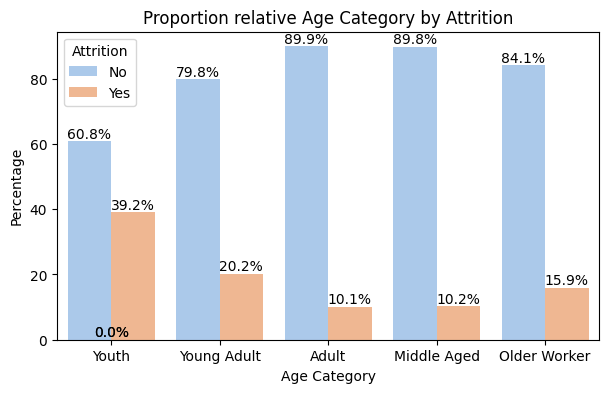

In [15]:
# Relative proportion for age category
cross_tab = pd.crosstab(df['AgeCategory'], df['Attrition'], normalize='index') * 100
cross_tab = cross_tab.reset_index().melt(id_vars='AgeCategory', var_name='Attrition', value_name='Percentage')

# Plot
plt.figure(figsize=(7,4))
sns.barplot(data=cross_tab, x='AgeCategory', y='Percentage',hue='Attrition',palette='pastel')
plt.title('Proportion relative Age Category by Attrition')
plt.xlabel('Age Category')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
for p in plt.gca().patches:
        plt.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

## 2. Jobs & Titles

<p>In this pahse we will use the features:</p>
<ul>
<li>Department</li>
<li>Job Role</li>
<li>Job Level</li>
<li>Job Involvement</li>
<li>Job Satisfaction</li>
<li>Performance Rating</li>
<li>Over Time</li>
<li>Business Travel</li>
</ul>

In [8]:
df[['Attrition','Department','JobRole','JobLevel','JobInvolvement','JobSatisfaction','PerformanceRating','OverTime','BusinessTravel']].head()

,Attrition,Department,JobRole,JobLevel,JobInvolvement,JobSatisfaction,PerformanceRating,OverTime,BusinessTravel
0,Yes,Sales,Sales Executive,2,3,4,3,Yes,Travel_Rarely
1,No,Research & Development,Research Scientist,2,2,2,4,No,Travel_Frequently
2,Yes,Research & Development,Laboratory Technician,1,2,3,3,Yes,Travel_Rarely
3,No,Research & Development,Research Scientist,1,3,3,3,Yes,Travel_Frequently
4,No,Research & Development,Laboratory Technician,1,3,2,3,No,Travel_Rarely


In [12]:
df[['Attrition','Department','JobRole','JobLevel','JobInvolvement','JobSatisfaction','PerformanceRating','OverTime','BusinessTravel']].nunique()

Attrition            2
Department           3
JobRole              9
JobLevel             5
JobInvolvement       4
JobSatisfaction      4
PerformanceRating    2
OverTime             2
BusinessTravel       3
dtype: int64

In [13]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1])

In [14]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5])

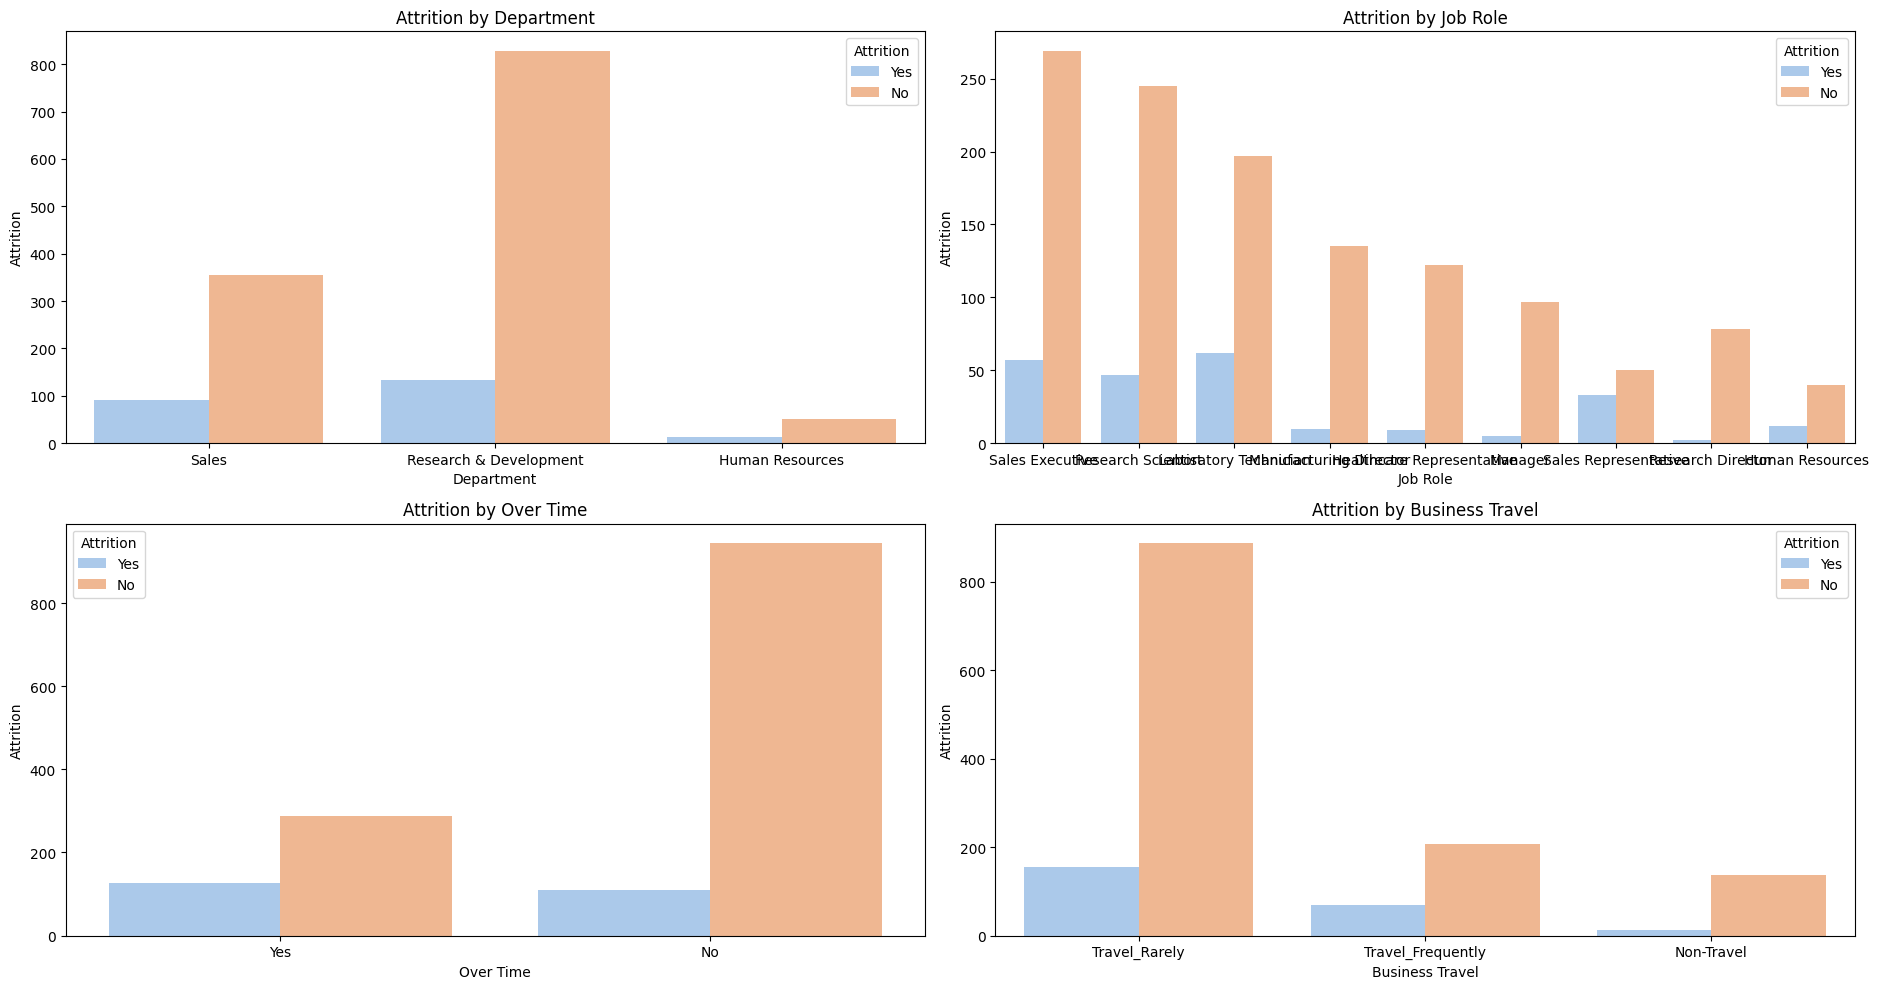

In [21]:
# Figure with several sub plots
fig, axs = plt.subplots(2, 2, figsize=(19, 10))
# Plot 1
sns.countplot(data=df, x='Department', hue='Attrition', palette='pastel', ax=axs[0, 0])
axs[0, 0].set_title('Attrition by Department')
axs[0, 0].set_xlabel('Department')
axs[0, 0].set_ylabel('Attrition')
axs[0, 0].legend(title='Attrition')

# Plot 2
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='pastel', ax=axs[0, 1])
axs[0, 1].set_title('Attrition by Job Role')
axs[0, 1].set_xlabel('Job Role')
axs[0, 1].set_ylabel('Attrition')
axs[0, 1].legend(title='Attrition')

# Plot 3
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='pastel', ax=axs[1, 0])
axs[1, 0].set_title('Attrition by Over Time')
axs[1, 0].set_xlabel('Over Time')
axs[1, 0].set_ylabel('Attrition')
axs[1, 0].legend(title='Attrition')

# Plot 4
sns.countplot(data=df, x='BusinessTravel', hue='Attrition', palette='pastel', ax=axs[1, 1])
axs[1, 1].set_title('Attrition by Business Travel')
axs[1, 1].set_xlabel('Business Travel')
axs[1, 1].set_ylabel('Attrition')
axs[1, 1].legend(title='Attrition')

# Shwo plot
plt.tight_layout()
plt.show()

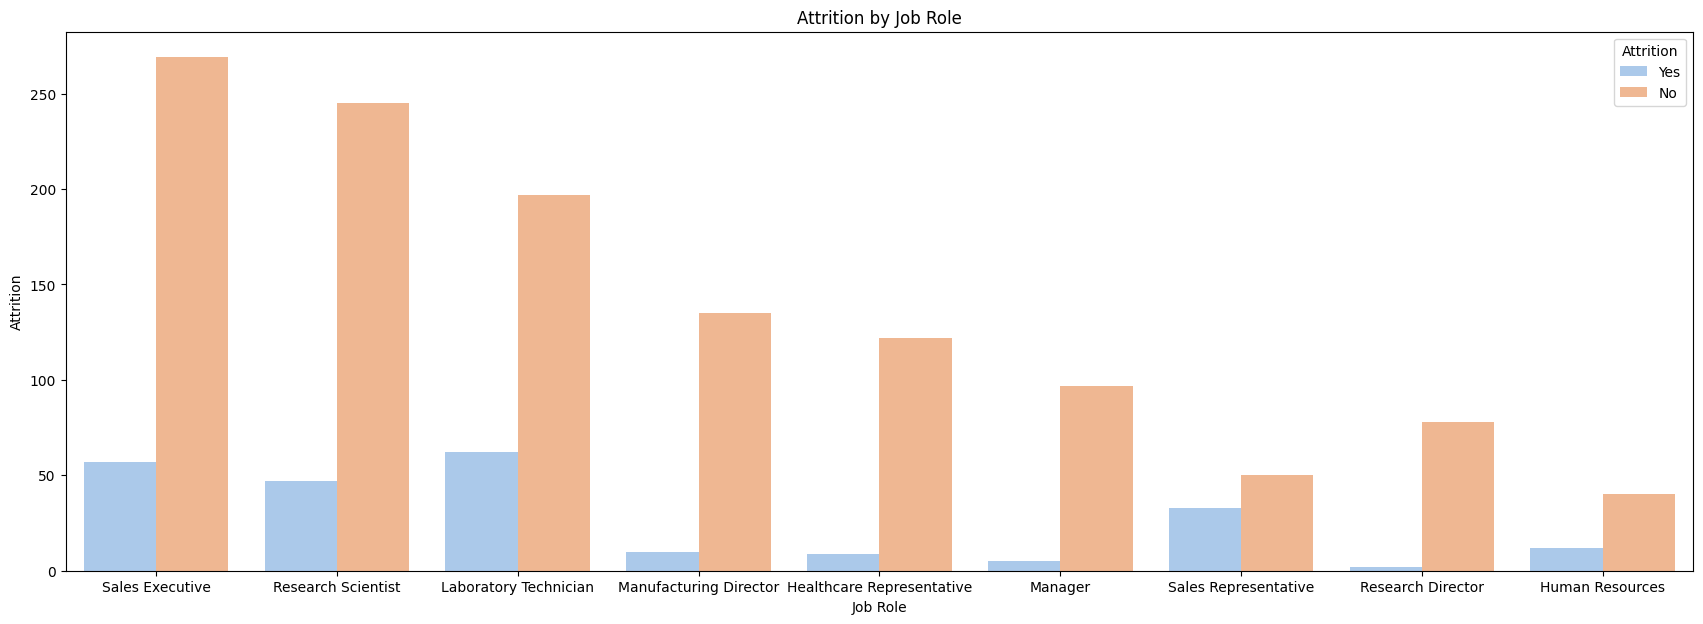

In [ ]:
# Clear visualization for Job Role
plt.figure(figsize=(21, 7))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='pastel')
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition')
plt.legend(title='Attrition')
plt.show()


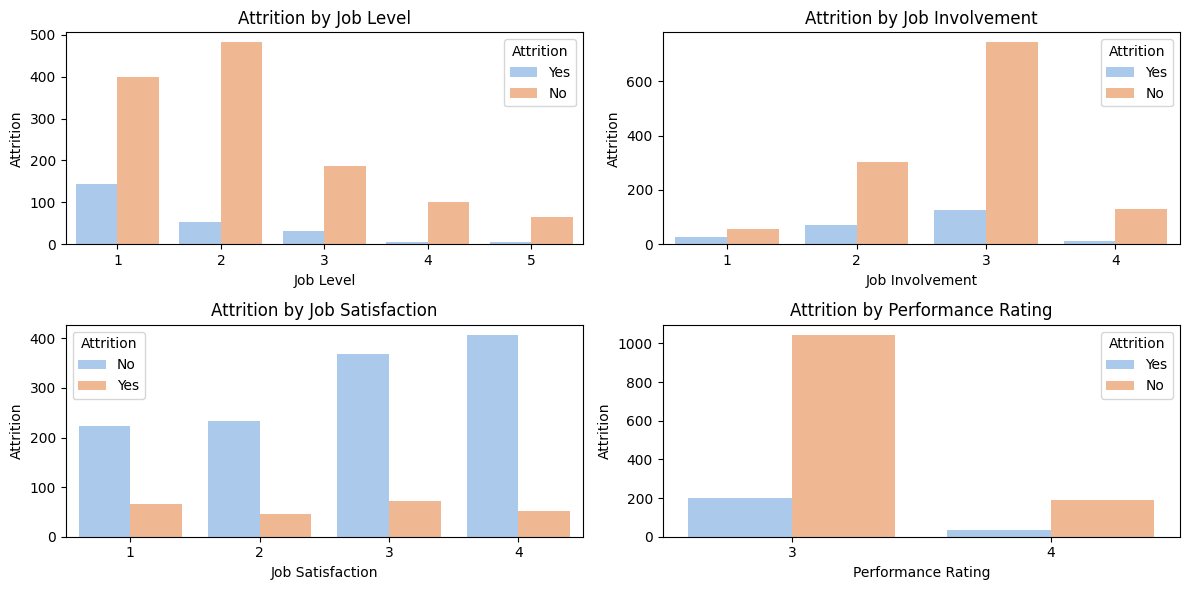

In [28]:
# Figure with several sub plots
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
# Plot 1
sns.countplot(data=df, x='JobLevel', hue='Attrition', palette='pastel', ax=axs[0, 0])
axs[0, 0].set_title('Attrition by Job Level')
axs[0, 0].set_xlabel('Job Level')
axs[0, 0].set_ylabel('Attrition')
axs[0, 0].legend(title='Attrition')

# Plot 2
sns.countplot(data=df, x='JobInvolvement', hue='Attrition', palette='pastel', ax=axs[0, 1])
axs[0, 1].set_title('Attrition by Job Involvement')
axs[0, 1].set_xlabel('Job Involvement')
axs[0, 1].set_ylabel('Attrition')
axs[0, 1].legend(title='Attrition')

# Plot 3
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='pastel', ax=axs[1, 0])
axs[1, 0].set_title('Attrition by Job Satisfaction')
axs[1, 0].set_xlabel('Job Satisfaction')
axs[1, 0].set_ylabel('Attrition')
axs[1, 0].legend(title='Attrition')

# Plot 4
sns.countplot(data=df, x='PerformanceRating', hue='Attrition', palette='pastel', ax=axs[1, 1])
axs[1, 1].set_title('Attrition by Performance Rating')
axs[1, 1].set_xlabel('Performance Rating')
axs[1, 1].set_ylabel('Attrition')
axs[1, 1].legend(title='Attrition')

# Shwo plot
plt.tight_layout()
plt.show()

<p><strong>Normalizing "relative proportions" to eliminate bias effects due to differences in the number of observations between categories</strong> Using pre-made "functions". </p>

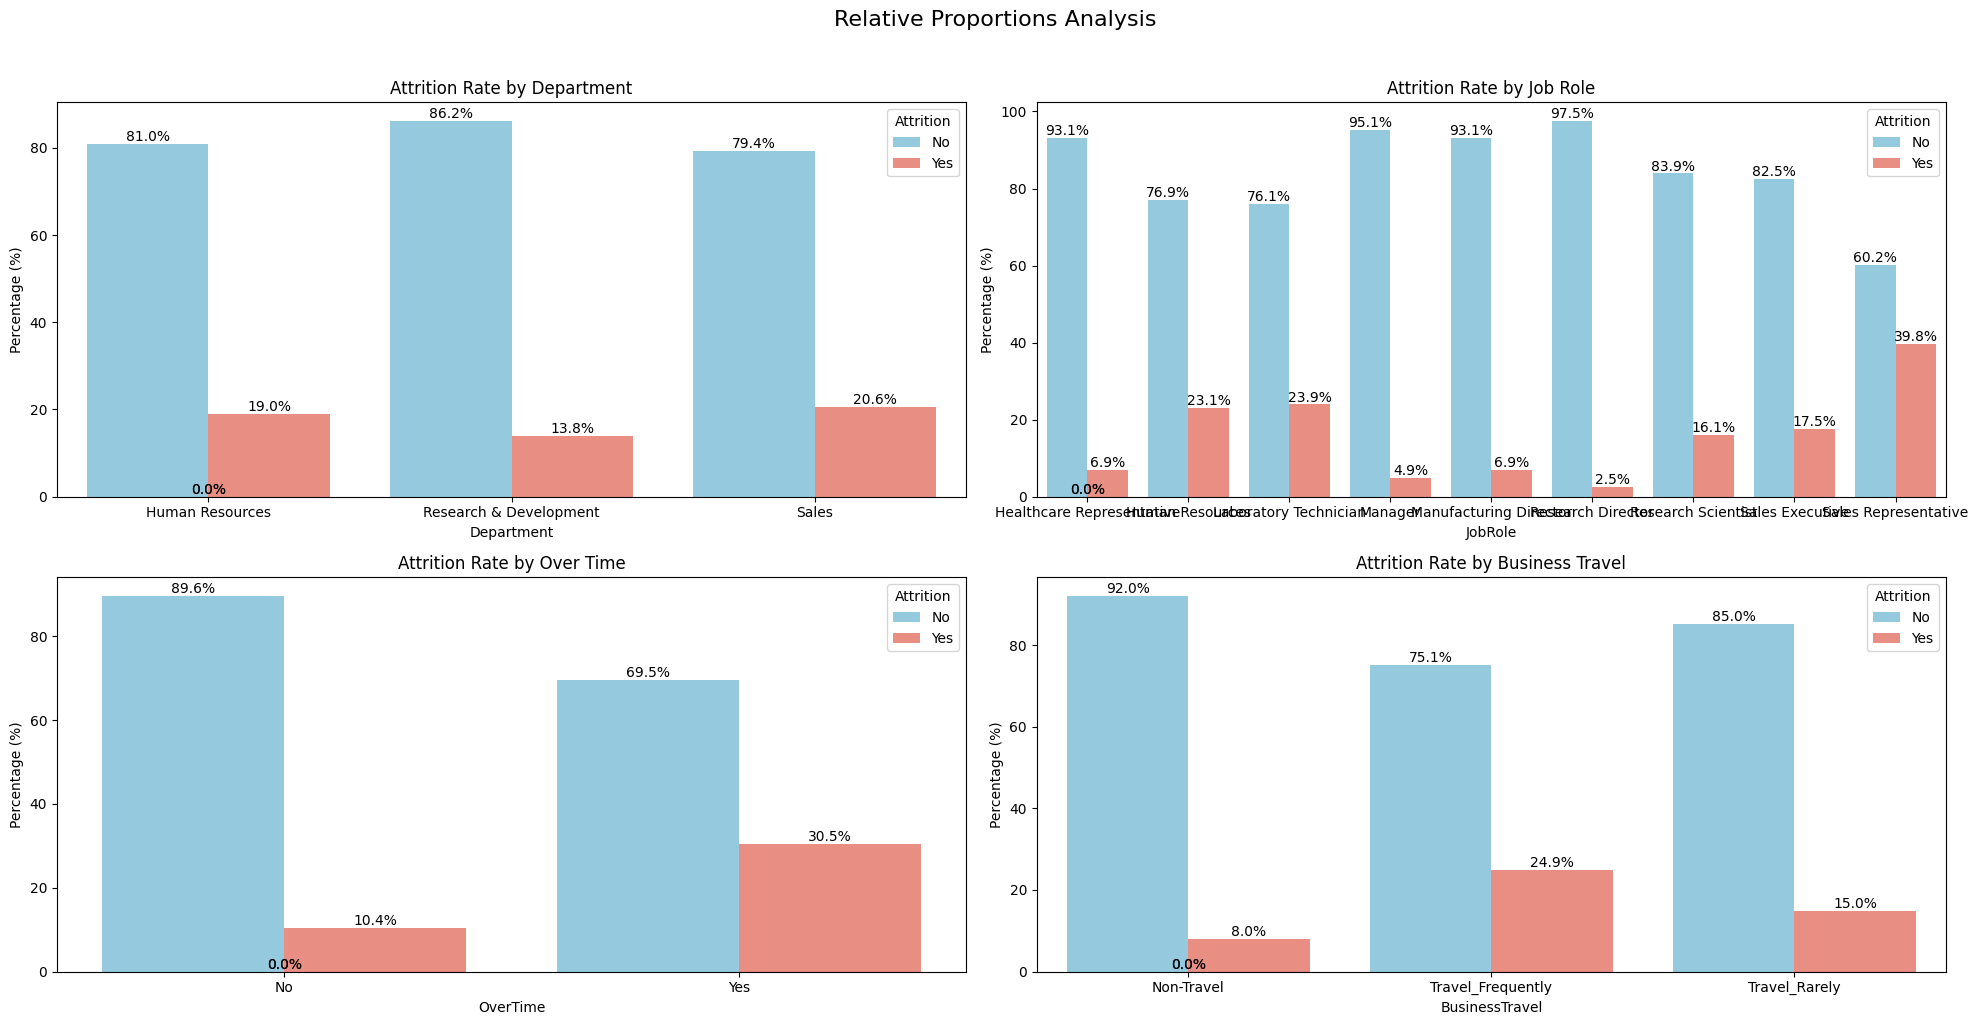

In [8]:
# Vizualiton
fig, axs = plt.subplots(2,2, figsize=(20,10))
plt.suptitle('Relative Proportions Analysis', fontsize=16, y=1.02)
# Plot 1
plot_percentage(df, 'Department', axs[0, 0], 'Attrition Rate by Department')
# plot 2
plot_percentage(df, 'JobRole', axs[0, 1], 'Attrition Rate by Job Role')
# plot 3
plot_percentage(df, 'OverTime', axs[1, 0], 'Attrition Rate by Over Time')
# plot 4
plot_percentage(df, 'BusinessTravel', axs[1, 1], 'Attrition Rate by Business Travel')

# Show the plot
plt.tight_layout()
plt.show()

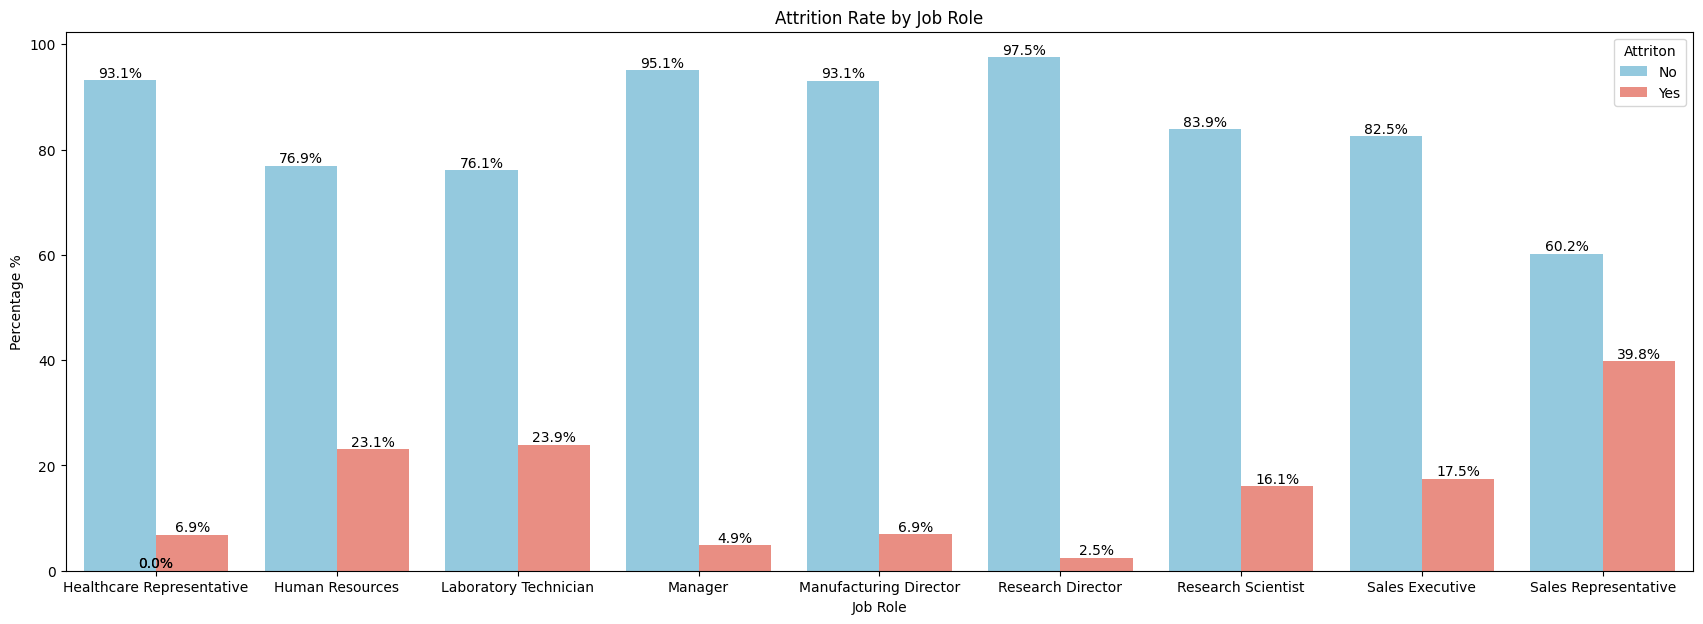

In [11]:
plt.figure(figsize=(21, 7))
cross_tab = pd.crosstab(df['JobRole'], df['Attrition'], normalize='index') * 100
cross_tab = cross_tab.reset_index().melt(id_vars='JobRole', var_name='Attrition', value_name='Percentage')
sns.barplot(data=cross_tab, x='JobRole', y='Percentage', hue='Attrition', palette=['skyblue', 'salmon'])
plt.title('Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Percentage %')
plt.legend(title='Attriton')
for p in plt.gca().patches:
        plt.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


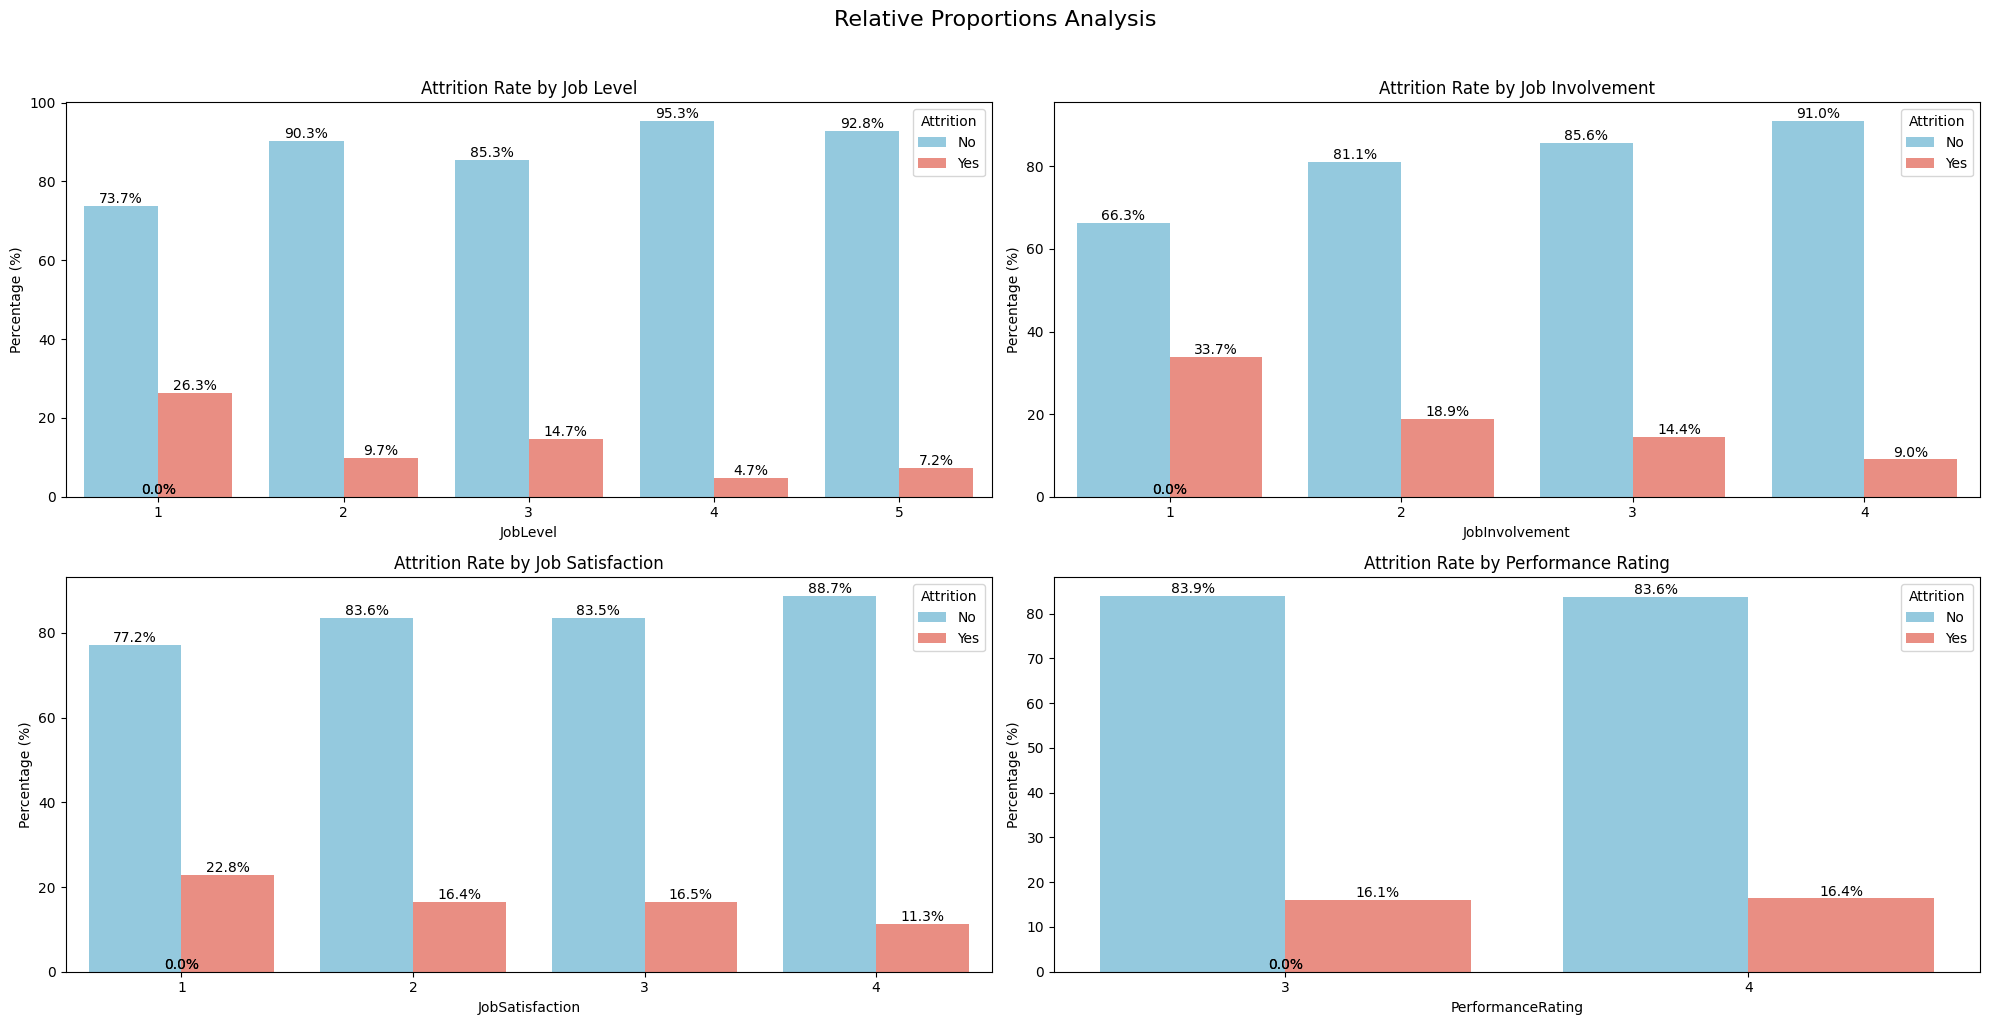

In [12]:
# Vizualiton
fig, axs = plt.subplots(2,2, figsize=(20,10))
plt.suptitle('Relative Proportions Analysis', fontsize=16, y=1.02)
# Plot 1
plot_percentage(df, 'JobLevel', axs[0, 0], 'Attrition Rate by Job Level')
# plot 2
plot_percentage(df, 'JobInvolvement', axs[0, 1], 'Attrition Rate by Job Involvement')
# plot 3
plot_percentage(df, 'JobSatisfaction', axs[1, 0], 'Attrition Rate by Job Satisfaction')
# plot 4
plot_percentage(df, 'PerformanceRating', axs[1, 1], 'Attrition Rate by Performance Rating')

# Show the plot
plt.tight_layout()
plt.show()

## 3. Compensation & Finance

<p>In this pahse we will use the features:</p>
<ul>
<li>Daily Rate</li>
<li>Hourly Rate</li>
<li>Monthly Income</li>
<li>Monthly Rate</li>
<li>Percent Salary Hike</li>
<li>Stock Option Level</li>
</ul>

In [3]:
df[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','StockOptionLevel']].head()

,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,StockOptionLevel
0,1102,94,5993,19479,11,0
1,279,61,5130,24907,23,1
2,1373,92,2090,2396,15,0
3,1392,56,2909,23159,11,0
4,591,40,3468,16632,12,1


In [4]:
df['StockOptionLevel'].unique()

array([0, 1, 3, 2])

In [5]:
df['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25])

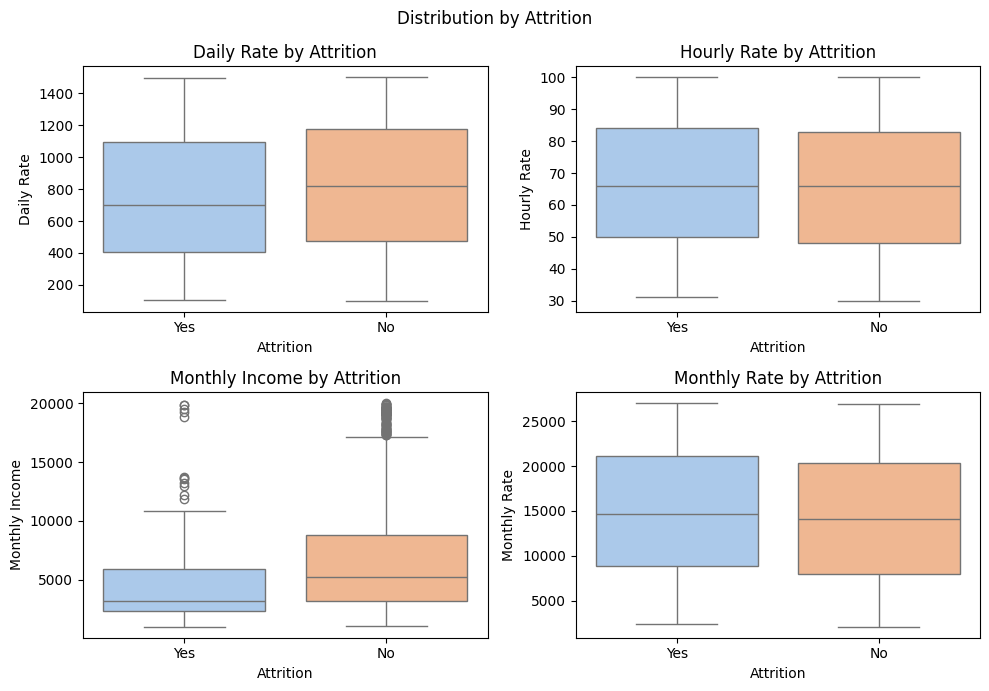

In [11]:
# Vizualization for distribution
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Distribution by Attrition')

# Plot 1
sns.boxplot(data=df, x='Attrition', y='DailyRate', palette='pastel', ax=axs[0, 0])
axs[0, 0].set_title('Daily Rate by Attrition')
axs[0, 0].set_xlabel('Attrition')
axs[0, 0].set_ylabel('Daily Rate')

# Plot 2
sns.boxplot(data=df, x='Attrition', y='HourlyRate', palette='pastel', ax=axs[0, 1])
axs[0, 1].set_title('Hourly Rate by Attrition')
axs[0, 1].set_xlabel('Attrition')
axs[0, 1].set_ylabel('Hourly Rate')

# Plot 3
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='pastel', ax=axs[1, 0])
axs[1, 0].set_title('Monthly Income by Attrition')
axs[1, 0].set_xlabel('Attrition')
axs[1, 0].set_ylabel('Monthly Income')

# Plot 1
sns.boxplot(data=df, x='Attrition', y='MonthlyRate', palette='pastel', ax=axs[1, 1])
axs[1, 1].set_title('Monthly Rate by Attrition')
axs[1, 1].set_xlabel('Attrition')
axs[1, 1].set_ylabel('Monthly Rate')

# show the plot
plt.tight_layout()
plt.show()

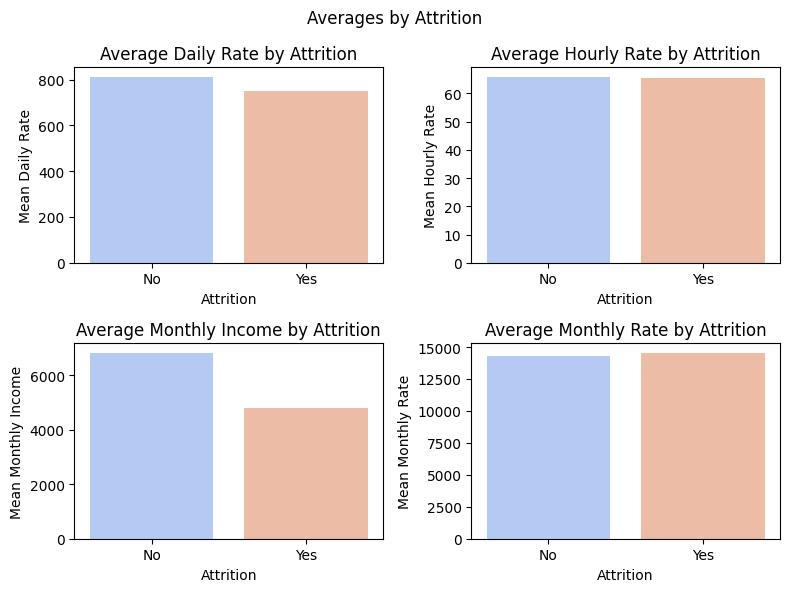

In [9]:
# Mean for each features
mean_drate = df.groupby('Attrition')['DailyRate'].mean().reset_index()
mean_hrate = df.groupby('Attrition')['HourlyRate'].mean().reset_index()
mean_mincome = df.groupby('Attrition')['MonthlyIncome'].mean().reset_index()
mean_mrate = df.groupby('Attrition')['MonthlyRate'].mean().reset_index()

# Bar chart
fig, axs  = plt.subplots(2, 2, figsize=(8, 6))
fig.suptitle('Averages by Attrition')

# Plot 1
sns.barplot(data=mean_drate, x='Attrition', y='DailyRate', palette='coolwarm', ax=axs[0, 0])
axs[0, 0].set_title('Average Daily Rate by Attrition')
axs[0, 0].set_xlabel('Attrition')
axs[0, 0].set_ylabel('Mean Daily Rate')

# Plot 2
sns.barplot(data=mean_hrate, x='Attrition', y='HourlyRate', palette='coolwarm', ax=axs[0, 1])
axs[0, 1].set_title('Average Hourly Rate by Attrition')
axs[0, 1].set_xlabel('Attrition')
axs[0, 1].set_ylabel('Mean Hourly Rate')

# Plot 3
sns.barplot(data=mean_mincome, x='Attrition', y='MonthlyIncome', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title('Average Monthly Income by Attrition')
axs[1, 0].set_xlabel('Attrition')
axs[1, 0].set_ylabel('Mean Monthly Income')

# Plot 4
sns.barplot(data=mean_mrate, x='Attrition', y='MonthlyRate', palette='coolwarm', ax=axs[1, 1])
axs[1, 1].set_title('Average Monthly Rate by Attrition')
axs[1, 1].set_xlabel('Attrition')
axs[1, 1].set_ylabel('Mean Monthly Rate')

# Show the plot
plt.tight_layout()
plt.show()

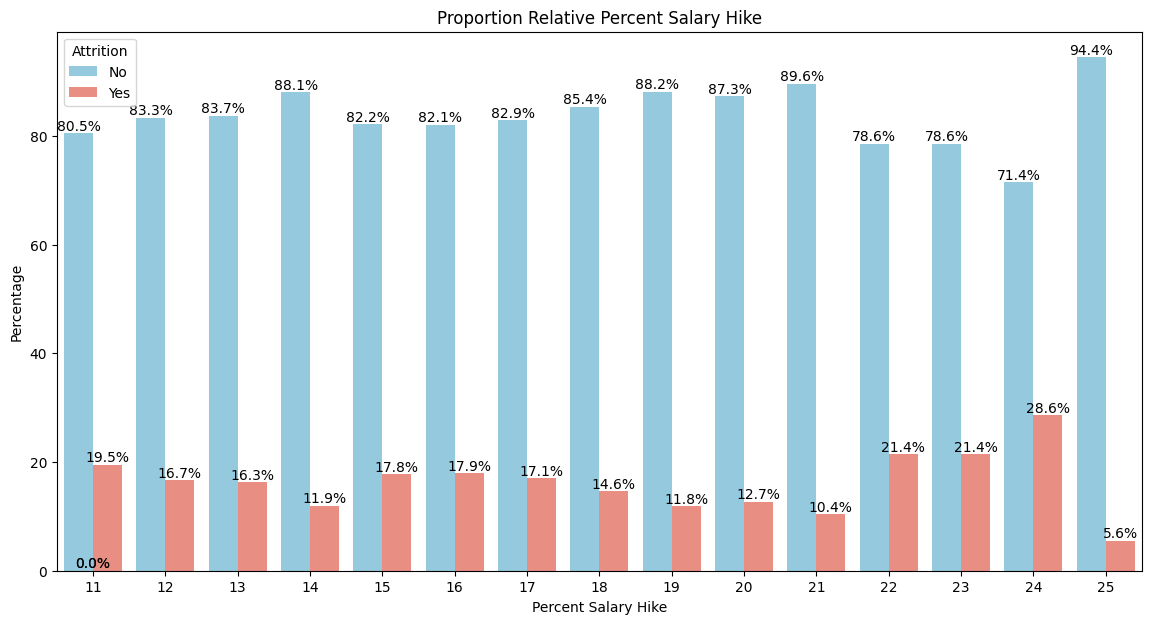

In [16]:
# Calculate Attrition percentage by PercentSalaryHike
cross_tab = pd.crosstab(df['PercentSalaryHike'], df['Attrition'], normalize='index') * 100
cross_tab = cross_tab.reset_index().melt(id_vars='PercentSalaryHike', var_name='Attrition', value_name='Percentage')

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=cross_tab, x='PercentSalaryHike', y='Percentage', hue='Attrition', palette=['skyblue', 'salmon'])
plt.title('Proportion Relative Percent Salary Hike')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
for p in plt.gca().patches:
        plt.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


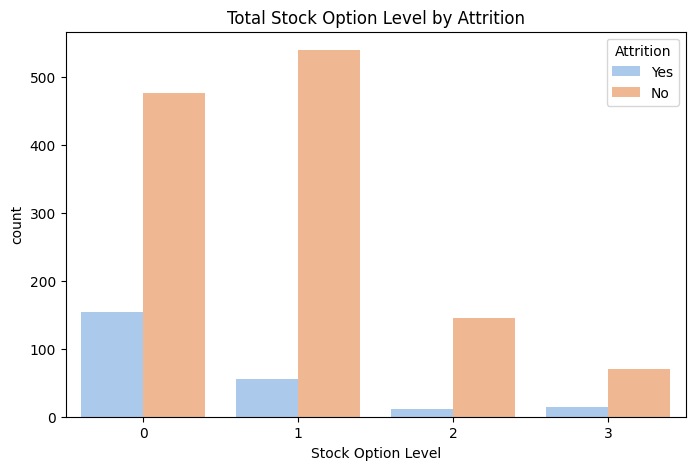

In [3]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='StockOptionLevel', hue='Attrition', palette='pastel')
plt.title('Total Stock Option Level by Attrition')
plt.xlabel('Stock Option Level')
plt.legend(title='Attrition')
plt.show()

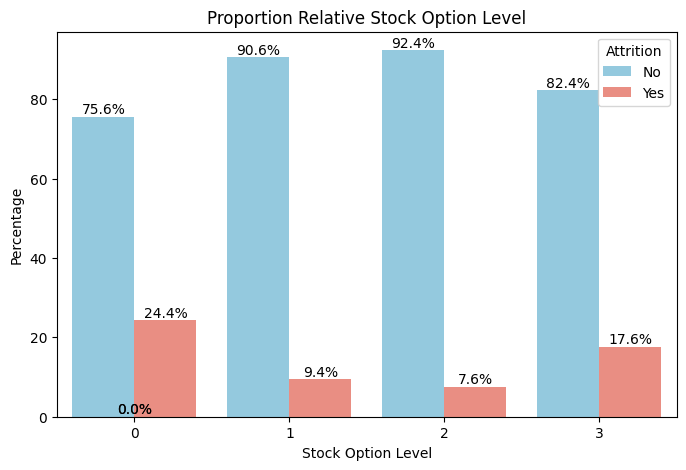

In [19]:
# Calculate Attrition percentage by StockOptionLevel
cross_tab = pd.crosstab(df['StockOptionLevel'], df['Attrition'], normalize='index') * 100
cross_tab = cross_tab.reset_index().melt(id_vars='StockOptionLevel', var_name='Attrition', value_name='Percentage')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=cross_tab, x='StockOptionLevel', y='Percentage', hue='Attrition', palette=['skyblue', 'salmon'])
plt.title('Proportion Relative Stock Option Level')
plt.xlabel('Stock Option Level')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
for p in plt.gca().patches:
        plt.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


## 4. Experience & Years of Work

<p>In this pahse we will use the features:</p>
<ul>
<li>Total Working Years</li>
<li>Years at Company</li>
<li>Years In Current Role</li>
<li>Years Since Last Promotion</li>
<li>Years With Curr Manager</li>
<li>Num Companies Worked</li>
</ul>

In [4]:
df[['Attrition','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked']].head()

,Attrition,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked
0,Yes,8,6,4,0,5,8
1,No,10,10,7,1,7,1
2,Yes,7,0,0,0,0,6
3,No,8,8,7,3,0,1
4,No,6,2,2,2,2,9


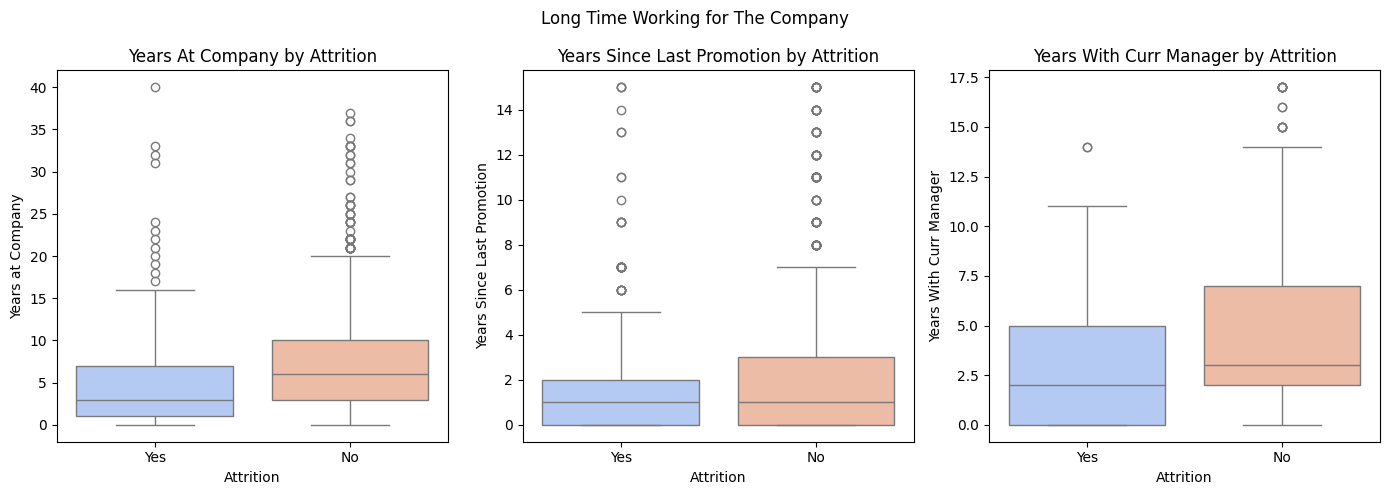

In [11]:
# Vizualitation for work at the company
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
fig.suptitle('Long Time Working for The Company')

# Plot 1
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany', palette='coolwarm', ax=axs[0])
axs[0].set_title('Years At Company by Attrition')
axs[0].set_xlabel('Attrition')
axs[0].set_ylabel('Years at Company')

# Plot 2
sns.boxplot(data=df, x='Attrition', y='YearsSinceLastPromotion', palette='coolwarm', ax=axs[1])
axs[1].set_title('Years Since Last Promotion by Attrition')
axs[1].set_xlabel('Attrition')
axs[1].set_ylabel('Years Since Last Promotion')

# Plot 3
sns.boxplot(data=df, x='Attrition', y='YearsWithCurrManager', palette='coolwarm', ax=axs[2])
axs[2].set_title('Years With Curr Manager by Attrition')
axs[2].set_xlabel('Attrition')
axs[2].set_ylabel('Years With Curr Manager')

# Show the plot
plt.tight_layout()
plt.show()

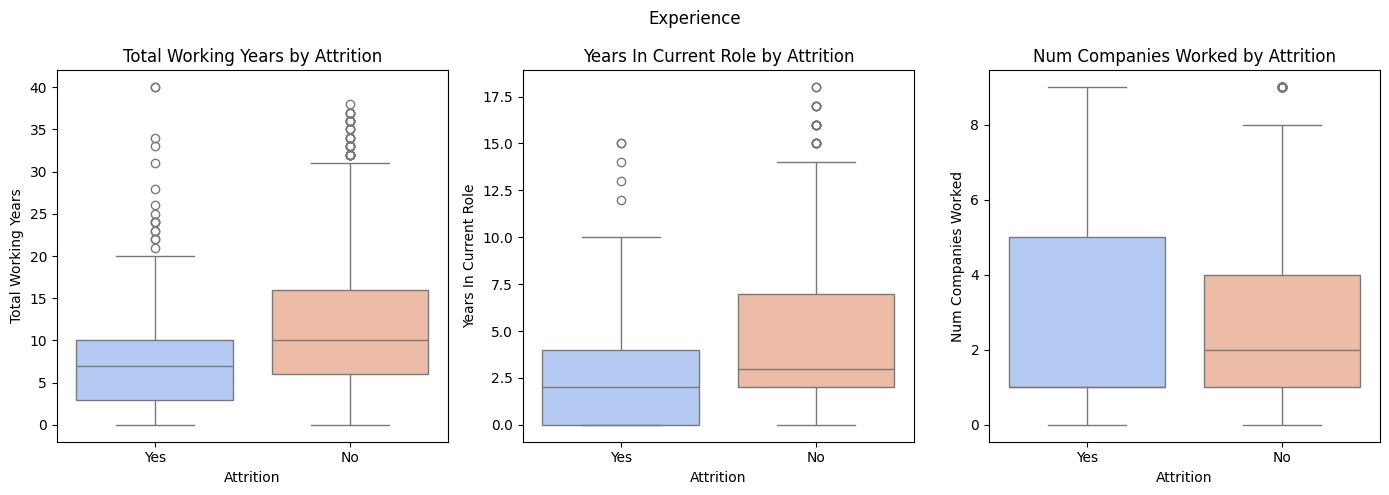

In [12]:
# Vizualitation for Experience
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
fig.suptitle('Experience')

# Plot 1
sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears', palette='coolwarm', ax=axs[0])
axs[0].set_title('Total Working Years by Attrition')
axs[0].set_xlabel('Attrition')
axs[0].set_ylabel('Total Working Years')

# Plot 2
sns.boxplot(data=df, x='Attrition', y='YearsInCurrentRole', palette='coolwarm', ax=axs[1])
axs[1].set_title('Years In Current Role by Attrition')
axs[1].set_xlabel('Attrition')
axs[1].set_ylabel('Years In Current Role')

# Plot 3
sns.boxplot(data=df, x='Attrition', y='NumCompaniesWorked', palette='coolwarm', ax=axs[2])
axs[2].set_title('Num Companies Worked by Attrition')
axs[2].set_xlabel('Attrition')
axs[2].set_ylabel('Num Companies Worked')

# Show the plot
plt.tight_layout()
plt.show()

## 5. Work Environment & Satisfaction

<p>In this phase we will use the features: </p>
<ul>
<li>Environment Satisfaction</li>
<li>Relationship Satisfaction</li>
<li>Work Life Balance</li>
<li>Distance From Home</li>
</ul>

In [4]:
selected_df = df[['Attrition','EnvironmentSatisfaction','RelationshipSatisfaction','WorkLifeBalance','DistanceFromHome']]
df[['Attrition','EnvironmentSatisfaction','RelationshipSatisfaction','WorkLifeBalance','DistanceFromHome']].head()

,Attrition,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DistanceFromHome
0,Yes,2,1,1,1
1,No,3,4,3,8
2,Yes,4,2,3,2
3,No,4,3,3,3
4,No,1,4,3,2


In [7]:
# Caluate unique values
print('Calculates unique values for the selected df \n')
for column in selected_df:
    unique_val = df[column].unique()
    print(f"Column '{column}': Unique Values = {unique_val}")

Calculates unique values for the selected df 

Column 'Attrition': Unique Values = ['Yes' 'No']
Column 'EnvironmentSatisfaction': Unique Values = [2 3 4 1]
Column 'RelationshipSatisfaction': Unique Values = [1 4 2 3]
Column 'WorkLifeBalance': Unique Values = [1 3 2 4]
Column 'DistanceFromHome': Unique Values = [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]


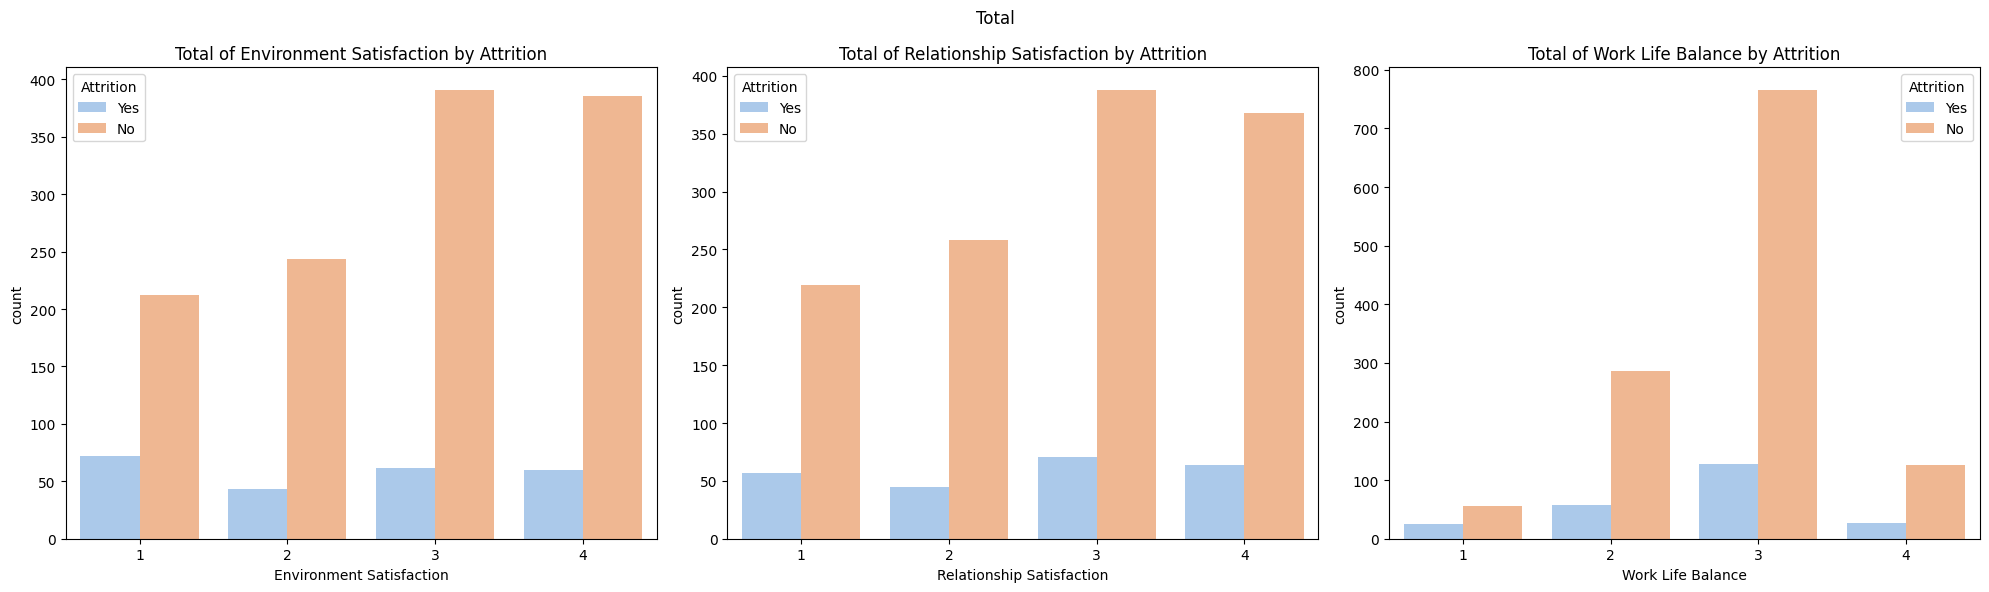

In [21]:
# Total
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Total')

# Plot 1
sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition', palette='pastel', ax=axs[0], hue_order=['Yes', 'No'])
axs[0].set_title('Total of Environment Satisfaction by Attrition')
axs[0].set_xlabel('Environment Satisfaction')
axs[0].legend(title='Attrition')

# Plot 2
sns.countplot(data=df, x='RelationshipSatisfaction', hue='Attrition', palette='pastel', ax=axs[1], hue_order=['Yes', 'No'])
axs[1].set_title('Total of Relationship Satisfaction by Attrition')
axs[1].set_xlabel('Relationship Satisfaction')
axs[1].legend(title='Attrition')

# Plot 3
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette='pastel', ax=axs[2], hue_order=['Yes', 'No'])
axs[2].set_title('Total of Work Life Balance by Attrition')
axs[2].set_xlabel('Work Life Balance')
axs[2].legend(title='Attrition')

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
# Function to plot relative proportion
def plot_percentage(data, x_var, ax, title):
    # Calculate
    cross_tab = pd.crosstab(data[x_var], data['Attrition'], normalize='index') * 100
    cross_tab = cross_tab.reset_index().melt(id_vars=x_var, var_name='Attrition', value_name='Percentage')
    # Plot
    sns.barplot(data=cross_tab, x=x_var, y='Percentage', hue='Attrition', palette=['skyblue','salmon'], ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_var)
    ax.set_ylabel('Percentage %')
    ax.legend(title='Attrition')
    # Adds a percentage
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

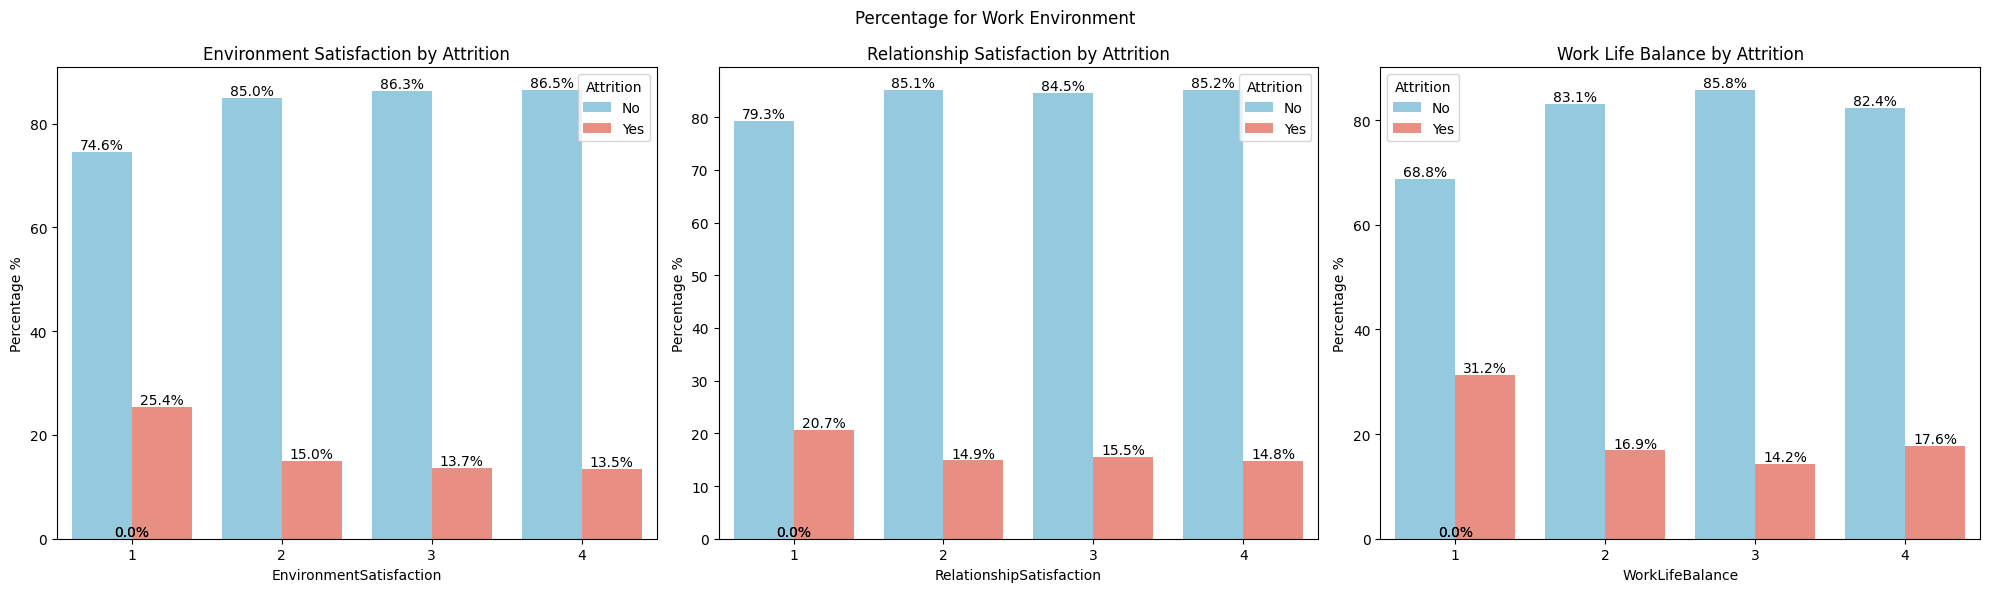

In [17]:
# Barplot
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Percentage for Work Environment')

# Plot 1
plot_percentage(df, 'EnvironmentSatisfaction', axs[0], 'Environment Satisfaction by Attrition')
# Plot 2
plot_percentage(df, 'RelationshipSatisfaction', axs[1], 'Relationship Satisfaction by Attrition')
# Plot 3
plot_percentage(df, 'WorkLifeBalance', axs[2], 'Work Life Balance by Attrition')

# show the plot
plt.tight_layout()
plt.show()

<strong>The DistanceFromHome feature will be changed to a category to facilitate analysis</strong>

In [ ]:
# Binning
bins = [1, 5, 15, 22, 29]
labels = ['Near', 'Moderate', 'Far', 'Very Far']
# Make new feature
df['DistanceCategory'] = pd.cut(
    df['DistanceFromHome'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

df[['Attrition','DistanceFromHome','DistanceCategory']].head()

,Attrition,DistanceFromHome,DistanceCategory
0,Yes,1,Near
1,No,8,Moderate
2,Yes,2,Near
3,No,3,Near
4,No,2,Near


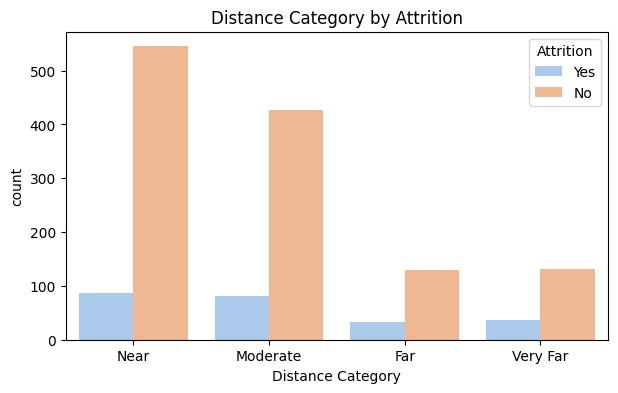

In [ ]:
# Total of Distance Category
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='DistanceCategory', hue='Attrition', palette='pastel')
plt.title('Distance Category by Attrition')
plt.xlabel('Distance Category')
plt.legend(title='Attrition')
plt.show()

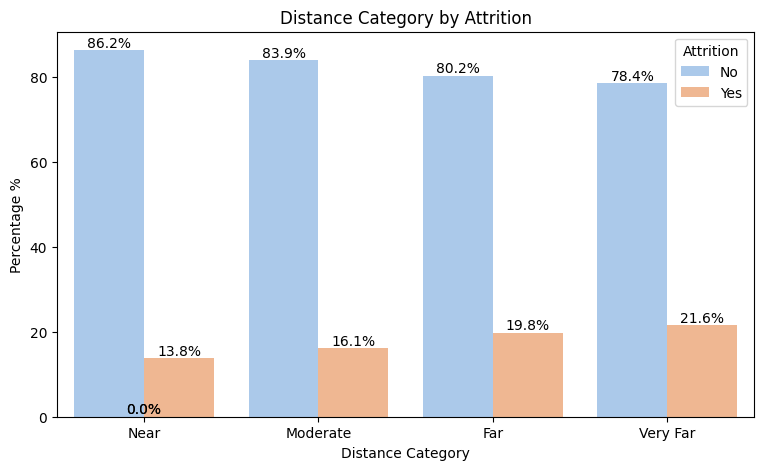

In [29]:
# Relative Proportions
cross_tab = pd.crosstab(df['DistanceCategory'], df['Attrition'], normalize='index') * 100
cross_tab = cross_tab.reset_index().melt(id_vars='DistanceCategory', var_name='Attrition', value_name='Percentage')

# Plot
plt.figure(figsize=(9, 5))
sns.barplot(data=cross_tab, x='DistanceCategory', y='Percentage', hue='Attrition', palette='pastel')
plt.title('Distance Category by Attrition')
plt.xlabel('Distance Category')
plt.ylabel('Percentage %')
plt.legend(title='Attrition')
# Adds a percentage
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

## 6. Training & Development

<p>In this phase, we will only use the last feature</p>

In [30]:
df[['Attrition','TrainingTimesLastYear']].head()

,Attrition,TrainingTimesLastYear
0,Yes,0
1,No,3
2,Yes,3
3,No,3
4,No,3


In [31]:
df['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6])

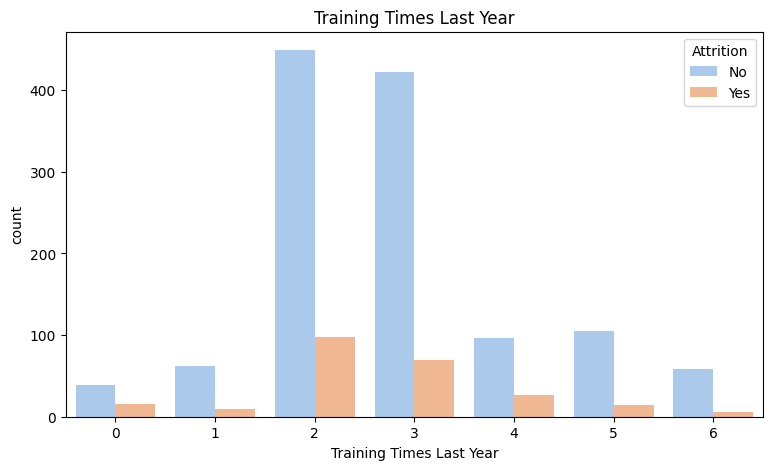

In [33]:
# Total of Training Times Last Year
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='TrainingTimesLastYear', hue='Attrition', palette='pastel', hue_order=['No', 'Yes'])
plt.title('Training Times Last Year')
plt.xlabel('Training Times Last Year')
plt.legend(title='Attrition')
plt.show()

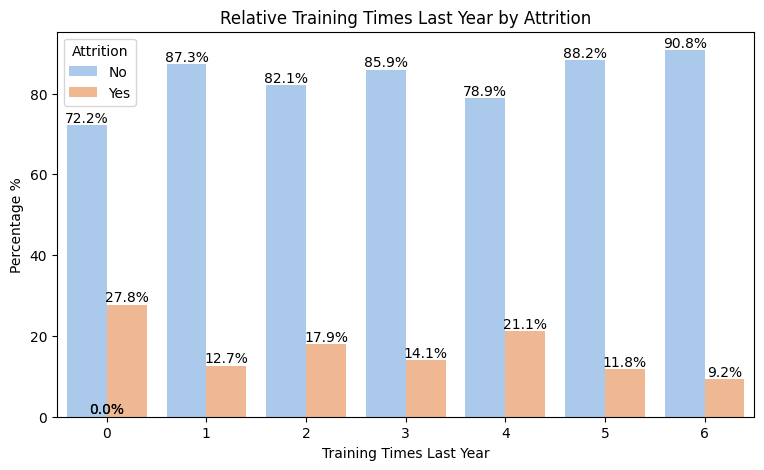

In [34]:
# Relative Proportions
cross_tab = pd.crosstab(df['TrainingTimesLastYear'], df['Attrition'], normalize='index') * 100
cross_tab = cross_tab.reset_index().melt(id_vars='TrainingTimesLastYear', var_name='Attrition', value_name='Percentage')

# Plot
plt.figure(figsize=(9, 5))
sns.barplot(data=cross_tab, x='TrainingTimesLastYear', y='Percentage', hue='Attrition', palette='pastel')
plt.title('Relative Training Times Last Year by Attrition')
plt.xlabel('Training Times Last Year')
plt.ylabel('Percentage %')
plt.legend(title='Attrition')
# Adds a percentage
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# 3. Deep Dive Analysis

In [2]:
# Loading DataFrame from pickle file
with open('./datasets/data_cleaned.pkl', 'rb') as file:
    df = pickle.load(file)

## 1. Demograpichs Risk Factor: Age & Marital Status

In [3]:
# Binning for Age Category
bins = [18, 24, 34, 44, 54, 60]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged', 'Older Worker']
# Make new feature
df['AgeCategory'] = pd.cut(
    df['Age'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [4]:
df[['Attrition','AgeCategory','MaritalStatus']].head()

,Attrition,AgeCategory,MaritalStatus
0,Yes,Adult,Single
1,No,Middle Aged,Married
2,Yes,Adult,Single
3,No,Young Adult,Married
4,No,Young Adult,Married


In [10]:
df[['Attrition','AgeCategory','MaritalStatus']].dtypes

Attrition          object
AgeCategory      category
MaritalStatus      object
dtype: object

In [11]:
df['AgeCategory'] = df['AgeCategory'].astype('object')

In [28]:
# Calculate frequency for each category combination
cross_tab = pd.crosstab(
    index =[df['AgeCategory'], df['MaritalStatus']],
    columns = df['Attrition'],
    normalize ='index'
)
cross_tab.head()

Attrition                        No       Yes
AgeCategory MaritalStatus                    
Adult       Divorced       0.882353  0.117647
            Married        0.924686  0.075314
            Single         0.870748  0.129252
Middle Aged Divorced       0.944444  0.055556
            Married        0.897638  0.102362

In [29]:
cross_tab = cross_tab.reset_index()
cross_tab['Group'] = cross_tab['AgeCategory'] + ' ' + cross_tab['MaritalStatus']
cross_tab.head()

Attrition,AgeCategory,MaritalStatus,No,Yes,Group
0,Adult,Divorced,0.882353,0.117647,Adult Divorced
1,Adult,Married,0.924686,0.075314,Adult Married
2,Adult,Single,0.870748,0.129252,Adult Single
3,Middle Aged,Divorced,0.944444,0.055556,Middle Aged Divorced
4,Middle Aged,Married,0.897638,0.102362,Middle Aged Married


In [30]:

melted_data = pd.melt(
    cross_tab,
    id_vars=['AgeCategory','MaritalStatus','Group'],
    value_vars=['Yes','No'],
    var_name='Attrition',
    value_name='Percentage'
)
melted_data.head()

,AgeCategory,MaritalStatus,Group,Attrition,Percentage
0,Adult,Divorced,Adult Divorced,Yes,0.117647
1,Adult,Married,Adult Married,Yes,0.075314
2,Adult,Single,Adult Single,Yes,0.129252
3,Middle Aged,Divorced,Middle Aged Divorced,Yes,0.055556
4,Middle Aged,Married,Middle Aged Married,Yes,0.102362


In [31]:
attrition_order = (
    melted_data[melted_data['Attrition'] == 'Yes']
    .groupby('Group')['Percentage']
    .sum()
    .sort_values(ascending=False)
    .index
)

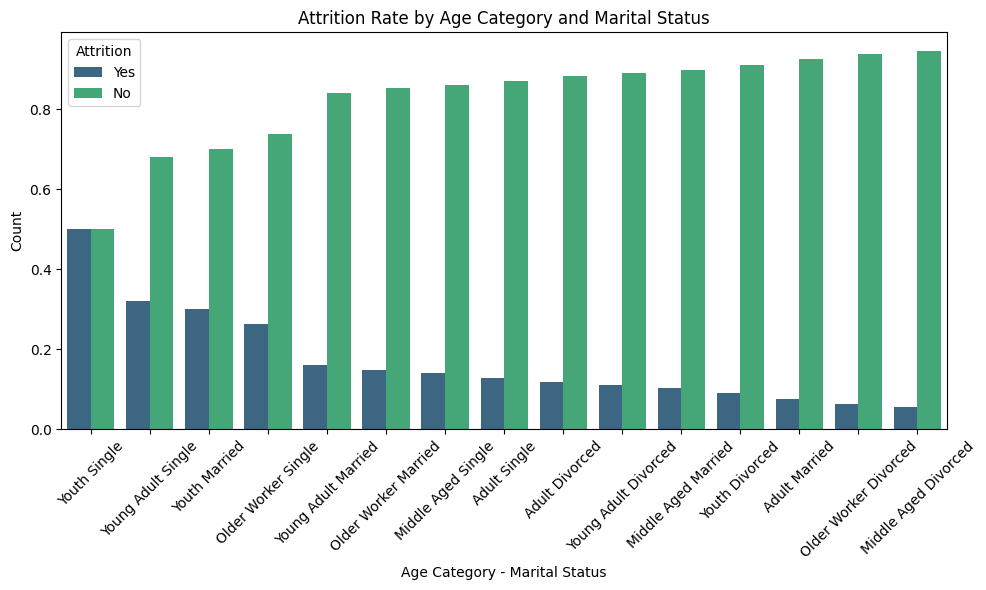

In [32]:
# Visualization
plt.figure(figsize=(10, 6))

# Stacked Bar Chart
sns.barplot(
    data=melted_data,
    x='Group',
    y='Percentage',
    hue='Attrition',
    palette='viridis',
    order=attrition_order
)
plt.title('Attrition Rate by Age Category and Marital Status')
plt.xlabel('Age Category - Marital Status')
plt.ylabel('Percentage' if 'normalize' in locals() else 'Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()